In [3]:
import pandas as pd
import matplotlib
import numpy as np
import datetime
%matplotlib inline

/usr/local/opt/pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
members = pd.read_csv('data/churn_comp_refresh/members_v2.csv')
# transactions = pd.read_csv('data/churn_comp_refresh/transactions_v2.csv')
# user_logs = pd.read_csv('data/churn_comp_refresh/user_logs_v2.csv')
# sample_submission = pd.read_csv('data/churn_comp_refresh/sample_submission_v2.csv')
# training = pd.read_csv('data/churn_comp_refresh/train_v2.csv')

# Members table

In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
1,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,20110918
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,20110920


In [6]:
# remove birthdays that are outside the realm of reasonableness
def remove_weird_ages(age):
    if age<100 and age>7:
        return int(age)
    return None
members['bd'] = pd.Series([remove_weird_ages(age) for age in members['bd']])

In [7]:
sum(members['bd'].isnull())/len(members['bd'])

0.6049881145530694

In [10]:
# 60% values are null, so create a dummy variable for them, and convert the actual NaNs to -1
members['age_is_null'] = members['bd'].isnull().astype(int)
members['bd'].fillna(-1, inplace=True)
members['bd'] = members['bd'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103e9de80>]], dtype=object)

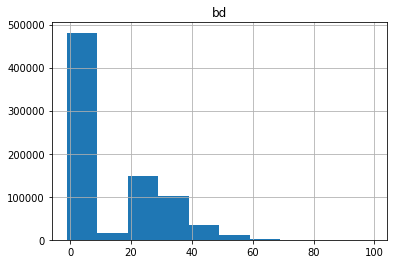

In [11]:
# check the output
members.hist('bd')

In [12]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,age_is_null
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,-1,NaN,7,20110914,0
1,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,0
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,-1,NaN,7,20110918,0
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,20110920,0


In [13]:
# create dummy variables for gender column
members['gender_is_null'] = members['gender'].isnull().astype(int)

In [14]:
# convert registration_init_time to days_since_start_of_membership (to the end of April 2017)
def days_since_init(date):
    return (datetime.datetime.strptime('20170501', '%Y%m%d') - 
            datetime.datetime.strptime(str(date), '%Y%m%d')).days

members['days_since_start_of_membership'] = pd.Series(
    [days_since_init(date) for date in members['registration_init_time']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106fa5390>]], dtype=object)

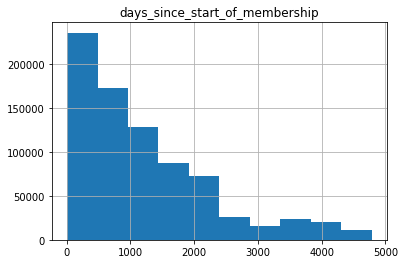

In [15]:
# check the output
members.hist('days_since_start_of_membership')

In [16]:
# create dummy variables for categorical variables
members = pd.get_dummies(members, columns=['city', 'gender', 'registered_via']) \
.rename(columns={'bd': 'age'}) \
.drop('registration_init_time', axis=1)

In [17]:
members.head()

,msno,age,age_is_null,gender_is_null,days_since_start_of_membership,city_1,city_3,city_4,city_5,city_6,...,city_20,city_21,city_22,gender_female,gender_male,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_13
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,-1,0,1,2056,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,32,0,0,2055,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,63,0,0,2052,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,-1,0,1,2052,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,28,0,0,2050,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
# store as HDFS
store = pd.HDFStore('store.h5')
store['members'] = members
store.close()